<a href="https://colab.research.google.com/github/nurdankar/Basic-TensorFlow-App/blob/master/Evri%C5%9FimliSinirA%C4%9F%C4%B1E%C4%9Fitme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sırasıyla Bir Evrişimli Sinir Ağı İçin Gereken Katmanlar

  1- Evrişim Katmanı (Aktivasyon Fonksiyonu(Activation Function), Yanlılık(Bias), Adım Kaydırma(Stride), Piksel Ekleme (Padding))

  2- Ortaklama Katmanı (Maksimum Ortaklama ya da Ortalama Ortaklama/Max Pooling or Average Pooling)

  3- Tam/ Tüm Bağlantı Katmanı(Fully Connected(FC))

In [ ]:
" Kimlik Doğrulama "

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
!ls                              

# Evrişimli Sinir Ağı Eğitme (Convolutional Neural Network Training)

Birinci katmanında evrişim işlemi ikinci katmanında ortaklama işlemi olacak şekilde bir sinir ağı inşa edelim.

In [1]:
" Gerekli kütüphanelerin İmport Edilmesi "

import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [2]:
" 0 İle Pixel Doldurma İşlemi "

def zero_pad(X, pad):
  X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = 0)
  return X_pad

x.shape= (4, 3, 3, 2)
x_pad.shape= (4, 7, 7, 2)
x[1,1]= [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1]= [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


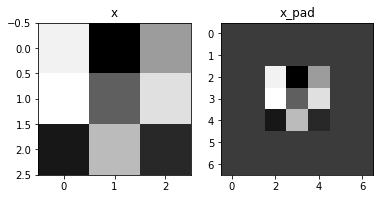

In [3]:
" Bir Yukarıda Yapılan İşlemin İçeriğinin Tanımlanması "

np.random.seed(1)                                       # random.seed komutuyla yukarıdaki değerleri tutmaya çalıştık
x = np.random.randn(4,3,3,2)                            # (4,3,3,2)'lik bir x oluşturduk
x_pad = zero_pad(x, 2)                                  # (x ,2)'lik bir padding işlemi yaptık

print('x.shape=', x.shape)
print('x_pad.shape=', x_pad.shape)
print('x[1,1]=', x[1,1])
print('x_pad[1,1]=', x_pad[1,1])

fig, axarr = plt.subplots(1,2)                          #Aynı ekran üzerinde iki veya daha fazla figürü çizdirmek için subplot kullanıyoruz
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [4]:
"Evrişim İşlemini Uygulamaya Giriş"
                                                       # Girdiler:'a_slice_prev':giriş matrisi, 'W':ağırlık matrisi, 'b: bias değeri / Çıktı: bir Z değeri 
def conv_single_step(a_slice_prev, W, b):              # Bu fonksiyonun içinde tek adımlık bir evrişim işlemi gerçekleştireceğiz
  s = np.multiply(a_slice_prev, W)                     # a_slice_prev ile W'nin çarpımı
  Z = np.sum(s)
  Z = float(b) + Z
  return Z                                             # Z = x.W + b eşitliğinin hesaplanması uygulanmış oldu

In [5]:
" Bir Yukarıda Yapılan İşlemin İçeriğinin Tanımlanması "

np.random.seed(1)                                      # Değerlerin tutulmasını sağlar
a_slice_prev = np.random.randn(4,4,3)                  # a_slice_prev matrisinin boyutu; (4,4,3)
W = np.random.randn(4,4,3)                             # Ağırlık matrisinin boyutu; (4,4,3)   [ !!! kanal sayıları eşit(3) ]
b = np.random.randn(1,1,1)

Z = conv_single_step(a_slice_prev, W, b)
print('Z=', Z)                                         # Beklenen Z çıktısı elde edilir

Z= -6.999089450680221


In [34]:
" Evrişim İşlemi "

def conv_forward(A_prev, W, b, hparameters):
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape      # Sırasıyla önceki matrisin yüksekliği(n_H_prev), ağırlığı(n_W_prev) ve kanal sayısı(n_C_prev)
  (f, f, n_C_prev, n_C) = W.shape                       # W için matrisin tanımlanması; Yukarıdaki ile kanal sayısı aynı(n_C)

  stride = hparameters['stride']                        # hparametreleri tanımladık(stride  ve padding)
  pad = hparameters['pad']

  n_H = int(((n_H_prev-f+2*pad)/stride)+1)              # Evrişimin çıkış boyutunun tanımlanması
  n_W = int(((n_W_prev-f+2*pad)/stride)+1) 

  Z = np.zeros([m, n_H, n_W, n_C])                      # 0 başlangıç koşulları ile matrisin oluşturulması
  A_prev_pad = zero_pad(A_prev, pad)

  "A_prev matrisine pixel ekleme işlemi yapacağız. Bunun için for döngüsü tanımlayıp, eğitim örneklerİ üzerinde döngü yapmış olacağız."

  for i in range(m):
    a_prev_pad = A_prev_pad[i]
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):

          vert_start = h*stride                                                 # Köşe bulma işlemlerinin yapılması
          vert_end = vert_start + f
          horiz_start = w*stride
          horiz_end = horiz_start + f

          a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end]

          Z[i, h, w, c] = conv_single_step(a_slice_prev, W[...,c], b[...,c])     # Evrişim işleminin gerçekleştirildiği kısım


  assert (Z.shape == (m, n_H, n_W, n_C))                                         # Çıkış değerinin boyutunun doğruluğunu kontrol etme

  cache = (A_prev, W, b, hparameters)                                            # Geriye yayılım işleminde gerekeceği için değerlerin saklanması

  return Z, cache                                                                              

In [36]:
" Bir Yukarıda Yapılan İşlemin İçeriğinin Tanımlanması "

np.random.seed(1)                                                                
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)

hparameters = {"pad": 2, "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

print("Z'nin ortalama =", np.mean(Z))
print("Z[3, 2, 1] =", Z[3, 2, 1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z'nin ortalama = 0.048995203528855794
Z[3, 2, 1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [37]:
" İleri Yönde Ortaklama İşlemi (Pool Forward) "

def pool_forward(A_prev, hparameters, mode = 'max'):
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

  f = hparameters["f"]
  stride = hparameters["stride"]

  n_H = int(1 + (n_H_prev - f)/ stride)     
  n_W = int(1 + (n_W_prev - f)/ stride)
  n_C = n_C_prev

  A = np.zeros([m, n_H, n_W, n_C])

  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):

          vert_start = h*stride
          vert_end = vert_start + f
          horiz_start = w*stride
          horiz_end = horiz_start + f

          a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

          if mode == 'max':
            A[i, h, w, c] = np.max(a_prev_slice)
          elif mode == 'average':
            A[i, h, w, c] = np.mean(a_prev_slice)

  cache = (A_prev, hparameters)
  assert (A.shape == (m, n_H, n_W, n_C))
  return A, cache

In [39]:
" Bir Yukarıda Yapılan İşlemin Ekrana Yazdırılması "

np.random.seed(1)

A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {'stride':2,'f':3}

A, cache = pool_forward(A_prev, hparameters)                             # Max ortaklama için sonuca bakıyoruz
print('mod = max')
print('A=',A)

A, cache = pool_forward(A_prev, hparameters, mode = 'average')           # Ortalama ortaklama için sonuca bakıyoruz
print('mod = average')
print('A=',A)

mod = max
A= [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]
mod = average
A= [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]


In [54]:
" Geriye Yayılım Aşaması (Backpropagation) "

def conv_backward(dZ, cache):
  (A_prev, W, b, hparameters) = cache
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
  (f, f, n_C_prev, n_C) = W.shape

  stride = hparameters["stride"]
  pad = hparameters["pad"]

  (m, n_H, n_W, n_C) = dZ.shape

  dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
  dW = np.zeros((f, f, n_C_prev, n_C))
  db = np.zeros((1, 1, 1, n_C))

  A_prev_pad = zero_pad(A_prev, pad)
  dA_prev_pad = zero_pad(dA_prev, pad)

  for i in range(m):
    a_prev_pad = A_prev[i]
    da_prev_pad = dA_prev_pad[i]
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):

          vert_start = h                                            
          vert_end = vert_start + f
          horiz_start = w
          horiz_end = horiz_start + f

          a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

          da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]

          dW[:, :, :, c] += a_slice * dZ[i, h, w, c]
          db[:, :, :, c] += dZ[i, h, w, c]

    dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]

  assert (dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
  return dA_prev, dW, db



In [55]:
" Bir Yukarıda Yapılan İşlemin Ekrana Yazdırılması "

np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)

print("dA ortalama=", np.mean(dA))
print("dW ortalama=", np.mean(dW))
print("db ortalama=", np.mean(db))


dA ortalama= 0.6347704472654743
dW ortalama= 2.4767500956259423
db ortalama= 7.839232564616838


In [56]:
" Maske/Filtre Tanımlama "

def create_mask_from_window(x):
  mask = x == np.max(x)               # Hata geriye yayılım yaparken max değer üzerinden yayılım yapar. Bu sebeple max değer aldık. (Burada çıkış değerine max değer etki ediyor)
  return mask


In [57]:
" Bir Yukarıda Yapılan İşlemin İçeriğinin Tanımlanması "

np.random.seed(1)
x = np.random.randn(2, 3)
mask = create_mask_from_window(x)

print("x =", x)
print("maske =", mask)

x = [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
maske = [[ True False False]
 [False False False]]


In [61]:
def distribute_value(dZ, shape):
  (n_H, n_W) = shape
  average = dZ / (n_H * n_W)
  a = np.ones(shape) * average
  return a

In [62]:
a = distribute_value(2, (2,2))
print("dagıtılmıs deger =", a)

dagıtılmıs deger = [[0.5 0.5]
 [0.5 0.5]]


In [68]:
" Geriye Yayılım Sürecinde Gerçekleşen Ortaklama İşlemi "

def pool_backward(dA, cache, mode = "max"):

  (A_prev, hparameters) = cache

  stride = hparameters["stride"]
  f = hparameters["f"]

  m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
  m, n_H, n_W, n_C = dA.shape
  dA_prev = np.zeros(A_prev.shape)

  for i in range(m):
   a_prev = A_prev[i]
   for h in range(n_H):
    for w in range(n_W):
      for c in range(n_C):

          vert_start = h
          vert_end = vert_start + f
          horiz_start = w
          horiz_end = horiz_start + f

          if mode == "max":                                                               # Geriye yayılım algoritmasının hangi modda devam edeceğini belirleme
            a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c] 
            mask = create_mask_from_window(a_prev_slice)
            dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c]) 
          elif mode == "average":
            da = dA[i, h, w, c]
            shape = (f, f)
            dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)

  assert (dA_prev.shape == A_prev.shape)
  return dA_prev             



In [69]:
"Geriye Yayılım ile Güncellenen Ağırlıklar ve Diğer Parametreler"

np.random.seed(1)

A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride": 1, "f":2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")

print("mod = max")
print("dA ortalaması=", np.max(dA))
print("dA_prev[1, 1]", dA_prev[1, 1])

A_prev = pool_backward(dA, cache, mode = "average")

print("mod = average")
print("dA ortalaması=", np.mean(dA))
print("dA_prev[1, 1]", dA_prev[1, 1])



mod = max
dA ortalaması= 2.528325706806398
dA_prev[1, 1] [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]
mod = average
dA ortalaması= 0.14571390272918056
dA_prev[1, 1] [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]


# Referanslar
1. Merve Ayyüce Kızrak, Udemy_DerinOgrenmeyeGiris Repository, GitHub

